# import

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.transforms import autoaugment, transforms
from torch.utils.data import DataLoader, random_split, ConcatDataset, Subset
from tqdm import tqdm
import models.optimizer.optimizer as optimizer
from torch.optim.lr_scheduler import ReduceLROnPlateau
from helper.training_early_stop import EarlyStop
import helper.utility as utility

# select device

In [2]:
device = utility.select_devices(use_cudnn_if_avaliable=True)

using CUDA + cudnn


# Data Pre-processing

### transformer parameter

In [3]:
# Alex 227, VGG 224, ResNet 224, Unet 96
size = (64, 64)
batch_size = 16
channels = 1

data_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=channels), 
    transforms.Resize(size),
    transforms.ToTensor()
])

### create dataloader

#### dataloader 1 RAF-DB

In [4]:
test_path = '../RAF-DB/test'
test_dataset1 = datasets.ImageFolder(test_path, transform=data_transforms)
test_loader = DataLoader(test_dataset1, batch_size=batch_size, shuffle=False, pin_memory=False, num_workers=16)

test_path2 = '../dataset/test/'
test_dataset2 = datasets.ImageFolder(test_path2, transform=data_transforms)
test_loader2 = DataLoader(test_dataset2, batch_size=batch_size, shuffle=False, pin_memory=False, num_workers=16)


In [5]:
test_l1 = test_loader
test_l2 = test_loader2

In [6]:
best_result = {}
final_result = {}
loss_result = {}

best_result = utility.read_pickle_files('./model_data/test_result/best_result.pkl')
final_result = utility.read_pickle_files('./model_data/test_result/final_result.pkl')
loss_result = utility.read_pickle_files('./model_data/test_result/loss_result.pkl')

In [7]:
# sort_best_result = sorted(best_result.items(), key=lambda x:x[1], reverse=True)
# print(sort_best_result[:3])
# sort_final_result = sorted(final_result.items(), key=lambda x:x[1], reverse=True)
# print(sort_final_result[:3])
# sort_loss_result = sorted(loss_result.items(), key=lambda x:x[1], reverse=True)
# print(sort_loss_result[:3])

### Test Accuracy

In [13]:
from models.new_models import custom_v7_2 as m
test_name = 'v7_Adam_[RAF(aug12)]'

model = m.EmotionCNN(num_classes=7, input_channel=channels)

pth = './model_data/custom/v7.2_Adam_[RAF(AutoAug12x5),FER(AutoAug12x5)]_LR_WB(A)_[L2:0.01]/'
pth_save_path = pth  + '/model.pth'
save_place = './model_data/test_result/'

# # # evaluate model
# result = utility.model_validation(model, device, test_loader, pth_save_path, save_place, file_name='1', ext=False,show=False)
# result = utility.model_validation(model, device, test_loader2, pth_save_path, save_place, file_name='2', ext=False,show=False)

model.load_state_dict(torch.load(pth_save_path))
model.to(device)
model.eval()
label = test_dataset1.class_to_idx
print(label)
label = ['angry', 'disgust', 'fear', 'happy', 'netural', 'sad', 'surprise']

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'netural': 4, 'sad': 5, 'surprise': 6}


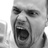

image is from ../dataset/test/angry/PrivateTest_1221822.jpg
model predicts it as "angry"


In [26]:
from PIL import Image

path = '../dataset/test/angry/PrivateTest_1221822.jpg'
img = Image.open(path)
img.show()
img = data_transforms(img).unsqueeze(0).to(device)
output = model(img)
predicted = torch.argmax(output.data, 1)
print(f'image is from {path}\nmodel predicts it as "{label[predicted]}"')

In [10]:
# utility.save_pickle_files(best_result, './model_data/test_result/best_result.pkl')
# print(best_result)
# utility.save_pickle_files(final_result, './model_data/test_result/final_result.pkl')
# print(final_result)
# utility.save_pickle_files(loss_result, './model_data/test_result/loss_result.pkl')
# print(loss_result)